# Interpolate Isochrones for Praesepe

Instead of interpolating boundary condition tables and computing a new set of models, we can interpolate between two metallicities to calculate new isochrones for Praesepe at metallicities between [Fe/H] = 0.00 and 0.20.

Load required libraries.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Read in isochrone files.

In [2]:
iso_zp00 = np.genfromtxt('data/dmestar_00600.0myr_z+0.00_a+0.00_marcs.iso')
iso_zp20 = np.genfromtxt('data/dmestar_00600.0myr_z+0.20_a+0.00_marcs.iso')

Check to confirm that isochrones are equal in length.

In [3]:
len(iso_zp00) == len(iso_zp20)

False

This is related to the fact that it was difficult to get models to converge at high metallicity below 0.26 Msun. Trimming the isochrones to be the same length.

In [4]:
def trimIsochrone(isochrone):
    bools = [0.26 <= x[0] <= 1.61 for x in isochrone]
    return np.compress(bools, isochrone, axis=0)

In [5]:
iso_zp00_trim = trimIsochrone(iso_zp00)
iso_zp20_trim = trimIsochrone(iso_zp20)

Again, check to confirm lengths are equal.

In [6]:
len(iso_zp00_trim) == len(iso_zp20_trim)

True

Now confirm that the mass resolution is equal for both isochrones.

In [7]:
for i, line in enumerate(iso_zp00_trim):
    if line[0] != iso_zp20_trim[i, 0]:
        raise ValueError('Masses are not equal between the two isochrones in row {:4.0f}.'.format(i))
        break
    else:
        pass

It appears that the masses at each point along the isochrones are equal. Now we may interpolate using a simple linear interpolation. Start by defining an interpolation routine.

In [8]:
def isoLinInterp(FeH):
    return iso_zp00_trim[:, 0:6] + (iso_zp20_trim[:, 0:6] - iso_zp00_trim[:, 0:6])*(FeH - 0.0)/0.20

and then interpolating at two intermediate points.

In [9]:
iso_zp10 = isoLinInterp(0.10)
iso_zp15 = isoLinInterp(0.15)

These should now be intermediate between the original two isochrones. Note that we've only interpolate fundamental properties, and not photometric magnitudes. These can be added separately as interpolating magnitudes in the isochrone may not be as accurate as interpolating bolometric corrections from the original data tables.

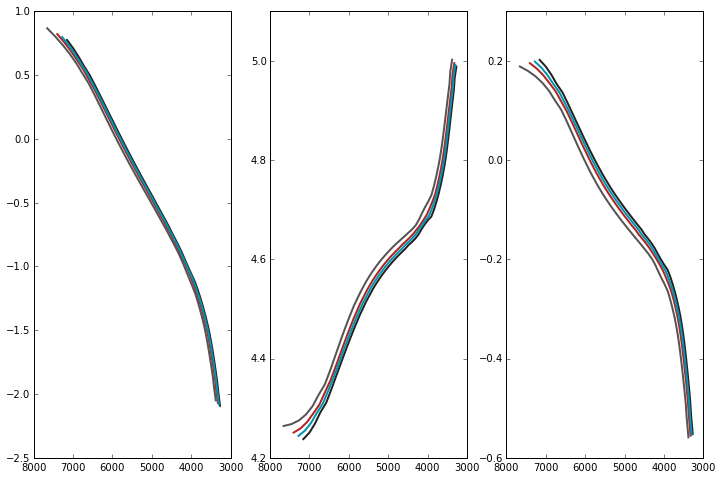

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12., 8.), sharex=True)

ax[0].set_xlim(8000., 3000.)

ax[0].plot(10**iso_zp00_trim[:,1], iso_zp00_trim[:,3], '-', lw=2, c='#555555')
ax[0].plot(10**iso_zp20_trim[:,1], iso_zp20_trim[:,3], '-', lw=2, c='#222222')
ax[0].plot(10**iso_zp10[:,1], iso_zp10[:,3], '-', lw=2, c='#b22222')
ax[0].plot(10**iso_zp15[:,1], iso_zp15[:,3], '-', lw=2, c='#0094b2')

ax[1].plot(10**iso_zp00_trim[:,1], iso_zp00_trim[:,2], '-', lw=2, c='#555555')
ax[1].plot(10**iso_zp20_trim[:,1], iso_zp20_trim[:,2], '-', lw=2, c='#222222')
ax[1].plot(10**iso_zp10[:,1], iso_zp10[:,2], '-', lw=2, c='#b22222')
ax[1].plot(10**iso_zp15[:,1], iso_zp15[:,2], '-', lw=2, c='#0094b2')

ax[2].plot(10**iso_zp00_trim[:,1], iso_zp00_trim[:,4], '-', lw=2, c='#555555')
ax[2].plot(10**iso_zp20_trim[:,1], iso_zp20_trim[:,4], '-', lw=2, c='#222222')
ax[2].plot(10**iso_zp10[:,1], iso_zp10[:,4], '-', lw=2, c='#b22222')
ax[2].plot(10**iso_zp15[:,1], iso_zp15[:,4], '-', lw=2, c='#0094b2')

The tracks shift as they should, so the interpolation worked! Now, we can save the new isochrones and compute colors for them separately.

In [11]:
np.savetxt('data/dmestar_00600.0myr_z+0.10_a+0.00_marcs.iso', iso_zp10, fmt='%14.8f')
np.savetxt('data/dmestar_00600.0myr_z+0.15_a+0.00_marcs.iso', iso_zp15, fmt='%14.8f')